In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pred = np.load("./best_predictions.npz", allow_pickle=True)

In [3]:
pred.files

['target_masks', 'targets', 'predictions', 'metrics', 'IDs']

In [4]:
#pred['metrics'][0]
pred['IDs']

array([list([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]),
       list([128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 21

In [5]:
pred['target_masks']

array([], dtype=float64)

In [6]:
y_truth = pred['targets']
y_pred = pred['predictions']

In [7]:
y_truth
y_pred.shape

(40,)

In [8]:
y_truth[2].shape

(128, 1)

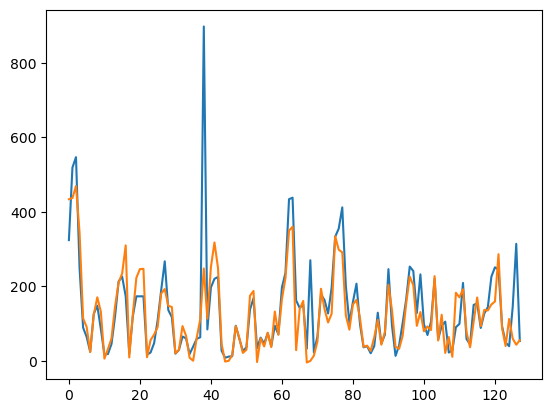

In [9]:
idx = 0
plt.plot(y_truth[idx])
plt.plot(y_pred[idx])

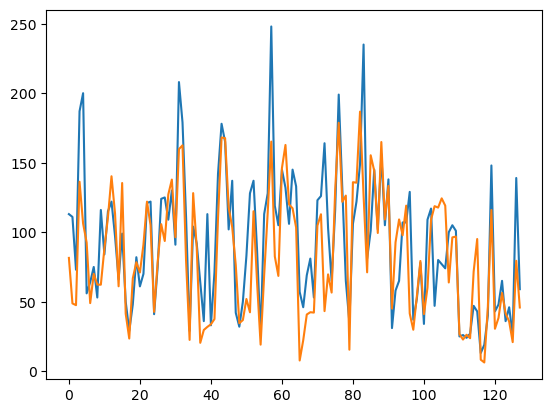

In [10]:
idx = 1
plt.plot(y_truth[idx])
plt.plot(y_pred[idx])

In [12]:
idx = 0

IndexError: index 40 is out of bounds for axis 0 with size 40

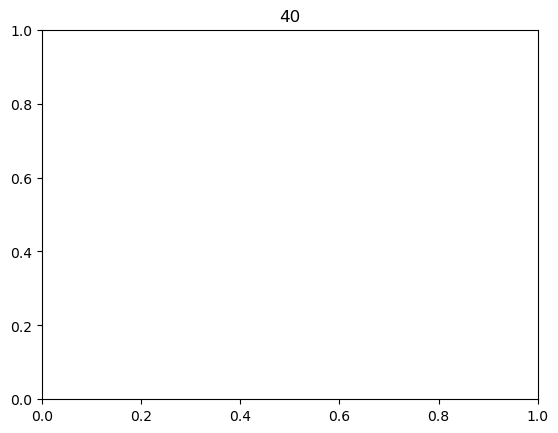

In [53]:
plt.title(str(idx))
plt.plot(y_truth[idx], c='g')
plt.plot(y_pred[idx], c='r')
idx += 1